In [1]:
import numpy as np
import tensorflow as tf

# Define 5x5 input matrix
input_matrix = np.array([[1, 2, 3, 0, 1],
                         [0, 1, 2, 3, 1],
                         [1, 0, 1, 2, 2],
                         [2, 1, 0, 1, 1],
                         [1, 2, 3, 1, 0]], dtype=np.float32)

# Reshape for TensorFlow (batch_size, height, width, channels)
input_tensor = tf.constant(input_matrix.reshape(1, 5, 5, 1))

# Define 3x3 kernel
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]], dtype=np.float32)

# Reshape for TensorFlow (height, width, in_channels, out_channels)
kernel_tensor = tf.constant(kernel.reshape(3, 3, 1, 1))

# Function to apply convolution
def apply_conv(stride, padding):
    result = tf.nn.conv2d(input_tensor, kernel_tensor, strides=[1, stride, stride, 1], padding=padding)
    return tf.squeeze(result).numpy()

# Apply with different parameters
print("Stride=1, Padding='VALID'\n", apply_conv(1, 'VALID'))
print("Stride=1, Padding='SAME'\n", apply_conv(1, 'SAME'))
print("Stride=2, Padding='VALID'\n", apply_conv(2, 'VALID'))
print("Stride=2, Padding='SAME'\n", apply_conv(2, 'SAME'))


Stride=1, Padding='VALID'
 [[-4. -2.  2.]
 [ 0. -4. -1.]
 [ 0. -1.  1.]]
Stride=1, Padding='SAME'
 [[-3. -4.  0.  3.  3.]
 [-3. -4. -2.  2.  5.]
 [-2.  0. -4. -1.  6.]
 [-3.  0. -1.  1.  4.]
 [-3.  0.  1.  2.  2.]]
Stride=2, Padding='VALID'
 [[-4.  2.]
 [ 0.  1.]]
Stride=2, Padding='SAME'
 [[-3.  0.  3.]
 [-2. -4.  6.]
 [-3.  1.  2.]]


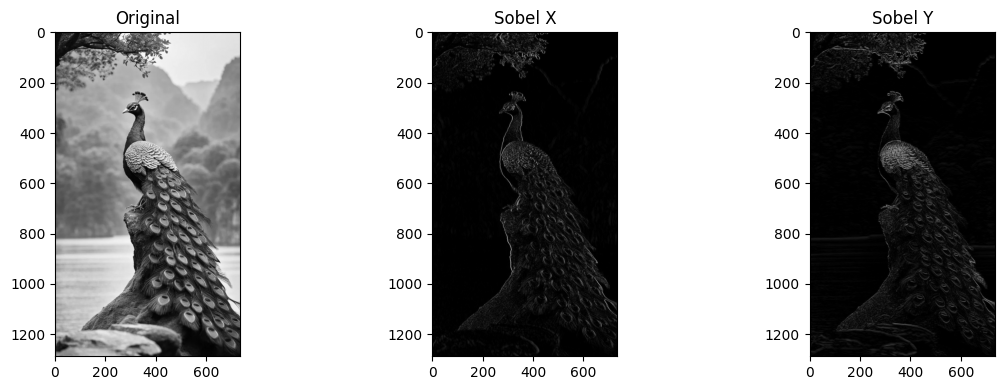

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load grayscale image (OpenCV comes with sample image)
image = cv2.imread('peacock.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Sobel in X and Y direction
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Plot results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title("Original")
plt.subplot(1, 3, 2), plt.imshow(np.abs(sobel_x), cmap='gray'), plt.title("Sobel X")
plt.subplot(1, 3, 3), plt.imshow(np.abs(sobel_y), cmap='gray'), plt.title("Sobel Y")
plt.tight_layout()
plt.show()


In [3]:
import tensorflow as tf
import numpy as np

# Create 4x4 matrix
input_matrix = np.random.randint(0, 10, (1, 4, 4, 1)).astype(np.float32)
print("Original Matrix:\n", input_matrix[0, :, :, 0])

# Max Pooling
max_pool = tf.nn.max_pool2d(input_matrix, ksize=2, strides=2, padding='VALID')
print("Max Pooled:\n", tf.squeeze(max_pool).numpy())

# Average Pooling
avg_pool = tf.nn.avg_pool2d(input_matrix, ksize=2, strides=2, padding='VALID')
print("Avg Pooled:\n", tf.squeeze(avg_pool).numpy())


Original Matrix:
 [[2. 3. 5. 8.]
 [6. 6. 8. 6.]
 [3. 1. 5. 0.]
 [3. 0. 6. 5.]]
Max Pooled:
 [[6. 8.]
 [3. 6.]]
Avg Pooled:
 [[4.25 6.75]
 [1.75 4.  ]]


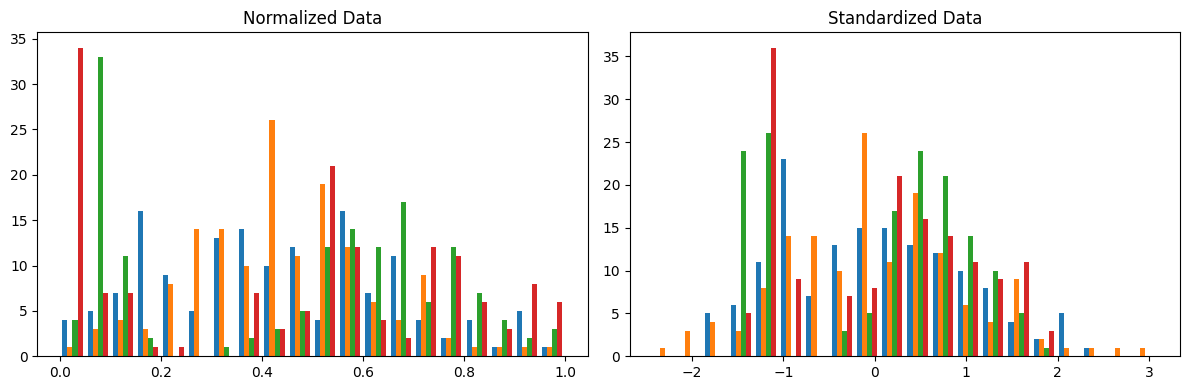

Original Accuracy: 1.0
Normalized Accuracy: 0.9666666666666667
Standardized Accuracy: 1.0


In [4]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Normalize data
minmax = MinMaxScaler()
X_norm = minmax.fit_transform(X)

# Standardize data
standard = StandardScaler()
X_std = standard.fit_transform(X)

# Plot histograms
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(X_norm, bins=20, label=iris.feature_names)
plt.title("Normalized Data")
plt.subplot(1, 2, 2)
plt.hist(X_std, bins=20, label=iris.feature_names)
plt.title("Standardized Data")
plt.tight_layout()
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without transformation
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
print("Original Accuracy:", model.score(X_test, y_test))

# With normalization
X_train_n, X_test_n, _, _ = train_test_split(X_norm, y, test_size=0.2, random_state=42)
model.fit(X_train_n, y_train)
print("Normalized Accuracy:", model.score(X_test_n, y_test))

# With standardization
X_train_s, X_test_s, _, _ = train_test_split(X_std, y, test_size=0.2, random_state=42)
model.fit(X_train_s, y_train)
print("Standardized Accuracy:", model.score(X_test_s, y_test))
